In [32]:
import pandas as pd
import numpy as np
import os

In [33]:
df = pd.read_csv(os.path.join('..', "arun/Resources/", 'diagnosis-of-covid-19-and-its-clinical-spectrum.csv'))

In [34]:
df.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#keep columns we have deemed important; this matches the input form on index.html file so people can run a saved model 
data = df[['sars_cov_2_exam_result','patient_age_quantile', 'leukocytes', 'platelets', 'monocytes', 'hematocrit', 'eosinophils', 'red_blood_cells', 'hemoglobin', 'lymphocytes', 'mean_platelet_volume']]

In [36]:
#save label data seperately 
target = data['sars_cov_2_exam_result']
target_names = ['negative', 'positive']

In [37]:
#drop label and keep features
data = data.drop('sars_cov_2_exam_result', axis=1)
feature_names=data.columns

In [38]:
#save features as X
X=data.values

In [39]:
#save labels as y
y=target.values

In [40]:
#SVM models in general work better when the dataset contains a somewhat large proportion of positive results. 
#Having less then 10% positive label in our dataset is not ideal for an SVM model. We see this later on with the results. 
target.value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: sars_cov_2_exam_result, dtype: float64

In [41]:
len(target)

5644

In [42]:
data.head()

,patient_age_quantile,leukocytes,platelets,monocytes,hematocrit,eosinophils,red_blood_cells,hemoglobin,lymphocytes,mean_platelet_volume
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,-0.09461,-0.517413,0.357547,0.236515,1.482158,0.102004,-0.02234,0.318366,0.010677
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#change label in string format to an int using label encoder. 0 is negative, 1 is positive for COVID 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 1]


In [44]:
#Deal with NaN; in this case we substitue NaN's for the mean value of that feature
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:len(feature_names)])
X[:, 1:len(feature_names)] = imputer.transform(X[:, 1:len(feature_names)])

In [45]:
#Split data 75/25 for training / testing. 
#We also tried 70/30 as well but results were the same. Any smaller of training set we risk overfitting.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
#Fit the model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
#Accuracy looks decent but this is deceptive
print('Test Acc: %.3f' % model.score(X_test, y_test)) 

Test Acc: 0.905


In [48]:
#The model predicted zero positive patients. Not good. That means, while our model is technically 90.5% accurate
# we missed all 558 positive tests. 
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.91      1.00      0.95      1277
    positive       0.00      0.00      0.00       134

    accuracy                           0.91      1411
   macro avg       0.45      0.50      0.48      1411
weighted avg       0.82      0.91      0.86      1411



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
#Running a grid search does not yield any better results. 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [180]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.902, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

KeyboardInterrupt: 

In [62]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [63]:
print(grid.best_score_)

0.899125915426


In [ ]:
predictions = grid.predict(X_test)

In [15]:
#Using a lindear kernal on this dataset isn't going to work. 
#After tuning the model we still have zero positive predictions. 

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.91      1.00      0.95      1280
    positive       0.00      0.00      0.00       131

    accuracy                           0.91      1411
   macro avg       0.45      0.50      0.48      1411
weighted avg       0.82      0.91      0.86      1411



In [79]:
#Evaluate model
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [80]:
print ('Confusion Matrix :')
print(cm) 
print(tn, fp, fn, tp) 
print ('Accuracy Score :',accuracy_score(y_test, predictions) )
print ('Report : ')
print (classification_report(y_test, predictions) )

Confusion Matrix :
[[1277    0]
 [ 134    0]]
1277 0 134 0
Accuracy Score : 0.9050318922749823
Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1277
           1       0.00      0.00      0.00       134

    accuracy                           0.91      1411
   macro avg       0.45      0.50      0.48      1411
weighted avg       0.82      0.91      0.86      1411



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Trying a polynomial kernal:

In [83]:
poly_kernel=SVC(kernel='poly')

In [84]:
#Grid search to tune C and gamma
from sklearn.model_selection import GridSearchCV
poly_param_grid = {'C': [1, 5,10],
              'gamma': [0.0001, 0.001, 0.01]}
poly_grid = GridSearchCV(poly_kernel, poly_param_grid, verbose=3)

In [85]:
poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.901, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.901, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.902, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [87]:
print(poly_grid.best_params_)

{'C': 10, 'gamma': 0.01}


In [88]:
print(poly_grid.best_score_)

0.9033789120829739


In [91]:
poly_predictions = poly_grid.predict(X_test)

In [92]:
#At least now we are making some positive predictions.
#The trouble is recall is very low, meaning we will get a lot of false negatives. In the case of testing for COVID, that
#is not acceptable. 
from sklearn.metrics import classification_report
print(classification_report(y_test, poly_predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.91      1.00      0.95      1277
    positive       0.88      0.05      0.10       134

    accuracy                           0.91      1411
   macro avg       0.89      0.53      0.53      1411
weighted avg       0.91      0.91      0.87      1411



In [93]:
poly_kernel = SVC(C=10, gamma=0.01, kernel='poly')


In [94]:
poly_kernel.fit(X_train, y_train)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
poly_prediction = poly_kernel.predict(X_test)

In [96]:
def model_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    sensitivity  = TP / (TP+FN)
    specificity  = TN / (TN+FP)
    pos_pred_val = TP/ (TP+FP)
    neg_pred_val = TN/ (TN+FN)

    return(sensitivity, specificity, pos_pred_val, neg_pred_val, TP, FP, TN, FN)

In [97]:
model_measure(y_test, poly_prediction)

(0.05223880597014925,
 0.9992169146436961,
 0.875,
 0.909479686386315,
 7,
 1,
 1276,
 127)

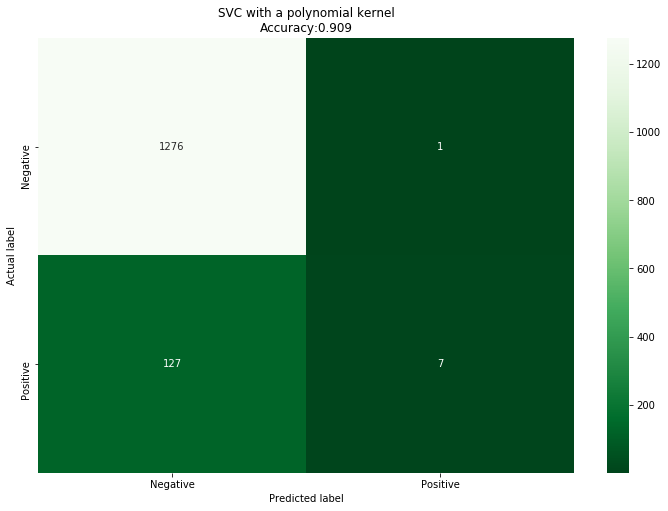

In [115]:
#Visualizing the confusion matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt


def plot_cm(y_test,y_pred,labels):
    # Creates a confusion matrix
    cm = confusion_matrix(y_test, y_pred) # for the tuned model

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = labels, 
                        columns = labels)


    plt.figure(figsize=(12,8))  
    sns.heatmap(cm_df, annot=True, cmap = "Greens_r", fmt='d')
    plt.title('SVC with a polynomial kernel\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig('svc_poly_heatmap_bloottest.png')
    plt.show()

plot_cm(y_test, poly_prediction, ['Negative','Positive'])

### Now with an rbf kernal:

In [99]:
rbf_kernel=SVC(kernel='rbf')

In [100]:
rbf_param_grid = {'C': [1, 5,10],
              'gamma': [0.0001, 0.001, 0.01]}
rbf_grid = GridSearchCV(rbf_kernel, rbf_param_grid, verbose=3)

In [101]:
rbf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.901, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.900, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [102]:
print(rbf_grid.best_params_)

{'C': 10, 'gamma': 0.01}


In [103]:
print(rbf_grid.best_score_)

0.9019610305877229


In [104]:
rbf_predictions = rbf_grid.predict(X_test)

In [105]:
#Better then linear kernel but still a poor model to use for testing COVID. 
print(classification_report(y_test, rbf_predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.91      1.00      0.95      1277
    positive       0.67      0.01      0.03       134

    accuracy                           0.91      1411
   macro avg       0.79      0.51      0.49      1411
weighted avg       0.88      0.91      0.86      1411



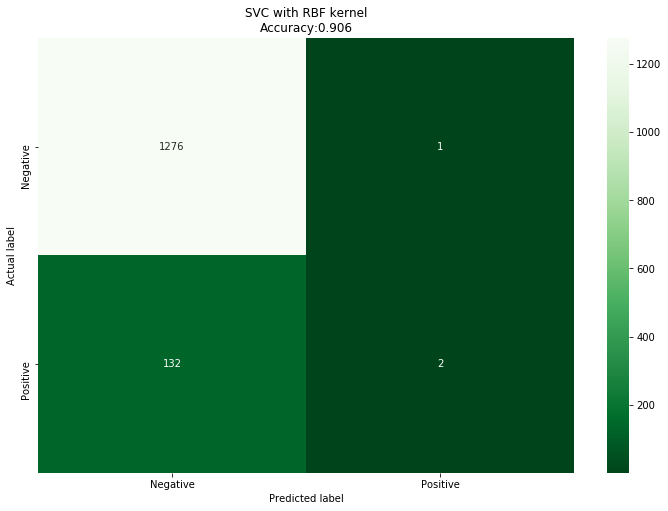

In [116]:
#Visual confusion matrix 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt


def plot_cm(y_test,y_pred,labels):
    # Creates a confusion matrix
    cm = confusion_matrix(y_test, y_pred) # for the tuned model

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = labels, 
                        columns = labels)


    plt.figure(figsize=(12,8))  
    sns.heatmap(cm_df, annot=True, cmap = "Greens_r", fmt='d')
    plt.title('SVC with RBF kernel\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig('svc_rbf_heatmap_bloottest.png')
    plt.show()

plot_cm(y_test, rbf_predictions, ['Negative','Positive'])

## The polynomial kernel yields the best results out of the three

In [117]:
from sklearn.svm import SVC 

deployed_model=SVC(C=10, gamma=0.01, kernel='poly')


In [118]:
deployed_model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
# Save the trained model to a file 
from sklearn.externals import joblib

joblib.dump(deployed_model, 'svc_model_covid_blood.pkl')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['svc_model_covid_blood.pkl']

In [120]:
#Load saved model and make a prediction with a new data point
model_svc = joblib.load('svc_model_covid_blood.pkl')

In [121]:
print(model_svc.predict([[ 19, -1.288428, -0.906829, 0.567652, 0.694287, -0.835508, 0.578024, 0.541564, -0.295726, -0.325903]]))

[1]
